**Import Libraries**

In [59]:
import numpy as np
import pandas as pd
import os
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Read the dataset**

In [60]:
train=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Encode categorical features and scale numerical features**

In [61]:
label_encoder = LabelEncoder()
scaler= StandardScaler()
df = train.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

**Compute and visualize covariance matrix**

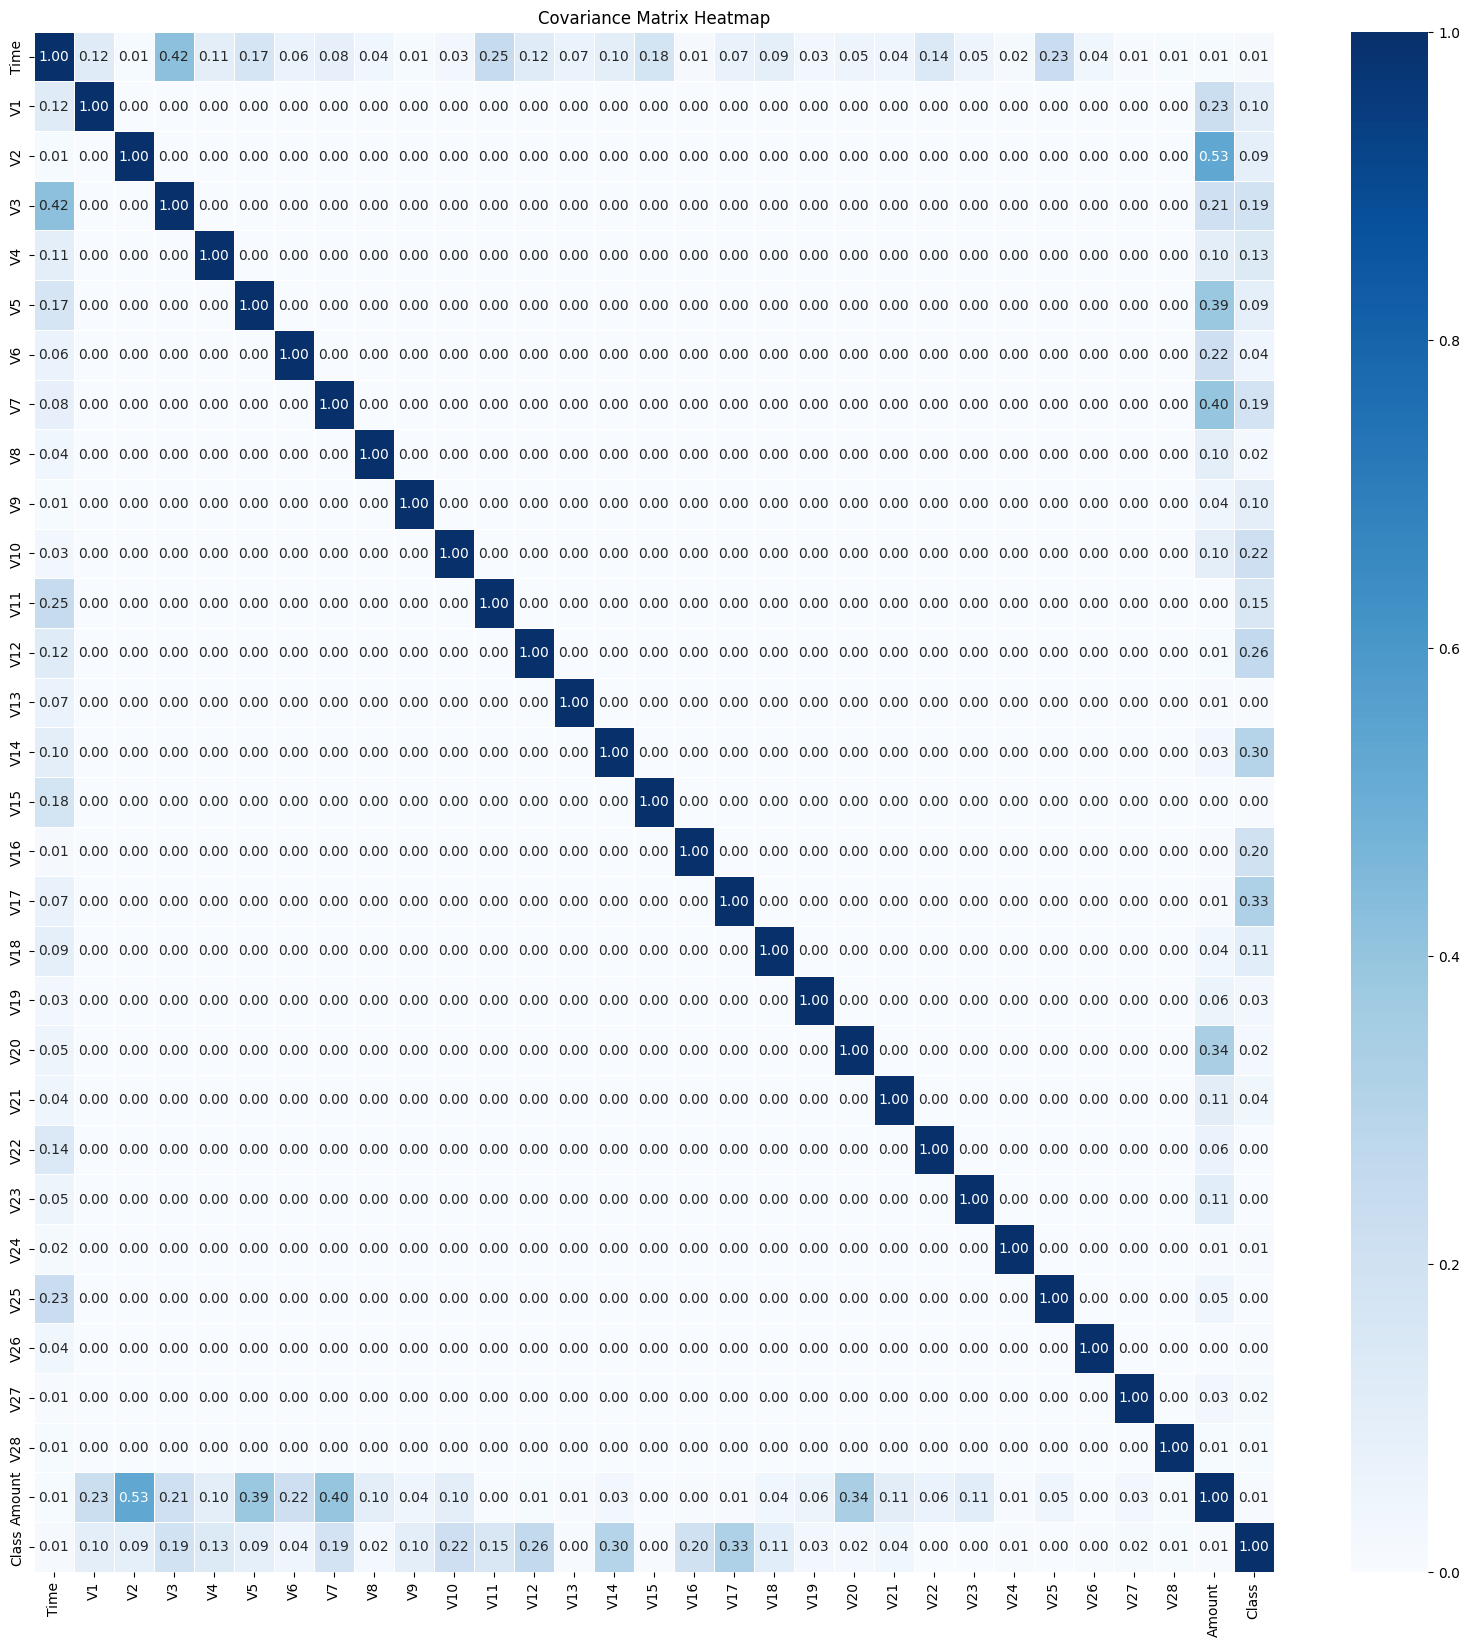

In [ ]:
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

**Drop unnecessary columns**

In [63]:
df=df.drop(['Time', 'V13', 'V15', 'V22', 'V23', 'V24','V25','V26','V28', 'Amount' ], axis=1)

**Split dataset into features and target variable**

In [64]:
X=df.drop(['Class'], axis=1)
Y=df['Class']
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**Import necessary libraries for modeling**

In [65]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

**Initialize XGBoost classifier**

In [66]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=3,subsample=0.8,colsample_bytree=0.9,n_estimators=500)

**Perform cross-validation**

In [67]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')

**Compute average accuracy**

In [68]:
accuracy_values = cv_results
average_accuracy = cv_results.mean()
print("Accuracy for each fold:", accuracy_values)
print("Average Accuracy across all folds:", average_accuracy)

Accuracy for each fold: [0.99959622 0.99964889 0.99942066 0.99952599 0.99961377]
Average Accuracy across all folds: 0.9995611058615165


**Split dataset into training and testing sets**

In [69]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

**Train the model**

In [70]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Make predictions**

In [71]:
prediction = model.predict(X_test)

**Compute confusion matrix and plot**

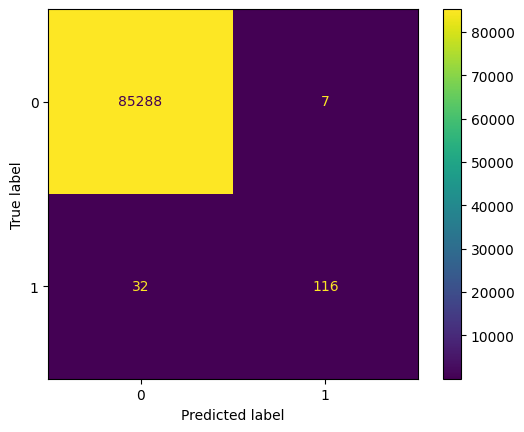

In [72]:
cm= metrics.confusion_matrix(y_test, prediction)
cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Class'].unique())
cm_dis.plot()
plt.show()

**Compute and display classification report**

In [73]:
classx= metrics.classification_report(y_test, prediction)
print('Classification Report:\n', classx)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.78      0.86       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

